## Unormalized and normalized (just uncomment and comment some text in laplacian_matrix function) Spectral clustering on moon data set

# Laplacian matrix

In [ ]:
def similarity_matrix(X):
  """
  Computes the similarity matrix of X, we here use gaussian kernel, sigma =0.2
  """
  N=len(X)
  W = np.zeros([N,N])
  sigma=0.2
  for i in range(N):
    for j in [x for x in range(N) if x != i]:
      temp = np.inner( (X[i]-X[j]), (X[i]-X[j]))
      W[i,j] = np.exp(-temp/(2*sigma**2))
  return W

def laplacian_matrix(X):
  """
  Computes the unormalised laplacian matrix of X
  """
  #I=np.identity(N) #add this line for normalized
  W=similarity_matrix(X)
  D = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      D[i,i] = D[i,i]+W[i,j]
      #D[i,i]=D[i,i]**(-0.5) #add this line for normalized 
  L = D - W #comment this line for normalized and uncomment the next line 
  #L = I - D @ W @ D #add this line for normalized 
  return L

def H_constrcution(X):
  """
  Computes H whose columns are the eigenvectors corresponding to the K minimal eigenvalues of L.
  """
  H = np.zeros([K,N])
  L = laplacian_matrix(X)
  _,V = np.linalg.eig(L)
  V = np.real(V)
  H = V[:, :K] #first K vects
  return H

# standard K-means

In [ ]:
def K_means_clustering_standard_SED(X,K):
    """
    Performs K-means-clustering with standard squared Euclidean distance
    Input : X : dataset (N : number samples x m : size of data/element)
            K : numbers of clusters  
    output : centroids : list with 
    centroids : list of element
    clusters : list of list of the indexes of each cluster 
    """
    
    N=len(X)
    random.seed(1000) #since we use random, we are going to set a seed,... not necessary
    centroids_index = random.sample(range(N), K)#Initialize centroids
    centroids=X[centroids_index]
    clusters = asign_clusters(centroids,X,K) #asign to cluster
    new_centroids=update_centroids(clusters,X,K) 

    number_it=1
    while loss(centroids,clusters,X,K)!= loss(new_centroids,asign_clusters(new_centroids,X,K),X,K): #while the centroids change, then (1) is improving by construction , we can also use > instead
        centroids=new_centroids.copy() #copy, python basic = to copy isn't enougth
        clusters = asign_clusters(centroids,X,K) #asign to cluster
        new_centroids=update_centroids(clusters, X,K)
        number_it +=1

    
    print("Iterations numbers " + str(number_it))

    return centroids


def loss(centroids,clusters,X,K):
    """
    Calculate loss : with squared euclidean distance
    Input : 
            centroids and clusters to compute loss from
            X : dataset 
            K : numbers of clusters  
    output : squared euclidean distance : L(X,k)=sum sum || Xi - Cl ||^2
    """
    loss=0
    for l in range(K):
        for i in clusters[l]:
            loss+=np.inner(X[i]-centroids[l],X[i]-centroids[l])
    return loss

def update_centroids(clusters, X,K):
    """
    update the new centroids computing the mean on clusters 
    """
    new_centroids=[]#placeholder
    for l in range(K):
        new_centroids.append(sommer(X[clusters[l]])/len(clusters[l]) ) #sommer is a function that compute the vector sum of a list of vectors
    return new_centroids

def asign_clusters(centroids,X,K): 
    """
    For each centroids, we asign each element of X in it's corresponding cluster
    We do the argmin of the standard squared euclidian norm 
    """
    clusters=[[] for i in range(K)] #placeholder
    for i in range(len(X)): 
        sed=[np.inner(X[i]-centroids[j],X[i]-centroids[j]) for j in range(K)] #for each element xi of X, sed is the distance from each centroids
        clusters[np.argmin(sed)].append(i)
    return clusters

def sommer(list_of_list):
    """
    Compute the vector sum of a list of vectors
    """
    Somme= [0]*len(list_of_list[0]) #placeholder, nul vector
    for i in range(len(list_of_list)):
        Somme=np.add(list_of_list[i],Somme)
    return Somme

# main 

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import random

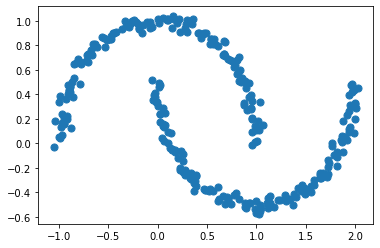

In [ ]:
N=300
X_moon, y_moon = make_moons(N, noise=0.035, random_state=20)
K=2

plt.scatter(X_moon[:,0],X_moon[:,1],s=50) #print the original data set

In [ ]:
K=2
H = H_constrcution(X_moon)
centroids=K_means_clustering_standard_SED(H,K)
clusters = asign_clusters(centroids,H,K) #cluster result

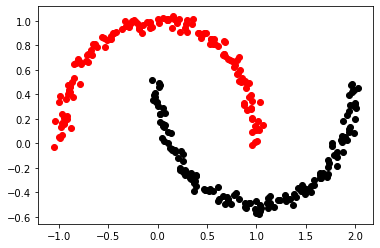

In [ ]:

cols=['k','r','y','g']
plt.figure()
for l in range(K):
    for point in clusters[l]:
        plt.scatter(X_moon[point, 0],X_moon[point, 1],  c=cols[l])
plt.show()